Détermination du taux d'apprentissage idéal pour la descente de gradient dans l'exemple à deux dimensions.

In [38]:
#imports
from numpy import pi, cos, sin, zeros, linspace, matmul, arange, identity, argmin
from numpy.linalg import inv, eigvals

from matplotlib.pyplot import plot, show, yscale, legend, title, ylim, savefig

Paramètres du modèle

In [39]:
#nombre de coefficients de Fourier ajustables
M = 10
M_range = arange(M) +1
# nombre de points pour la variable indépendante
N = 100
#liste des points de test
T = linspace(0,1,N)

W = 2*pi

Matrice $\mathcal{M}$ telle que $\vec{g} = \mathcal{M} \vec{A} + \vec{d}$

In [40]:
#matrice de coefficients (m*W*T[i]) de taille NxM
#avec première coordonnée i, et deuxème m
m_w_T = W*matmul(T.reshape((N,1)), M_range.reshape((1,M)))
cos = cos(m_w_T)
sin = sin(m_w_T)

mat = zeros((2*M,2*M))

for l in range(1,M+1) :
    for m in range(1,M+1) :
        for i in range(N) :
            mat[l-1,m-1] += (1-l)*(1-m)*sin[i,m-1]*sin[i,l-1]
            mat[l-1,m-1] += ((1-l)*cos[i,l-1]-1)*((1-m)*cos[i,m-1]-1)

            mat[l-1,m-1+M] += (1-l)*sin[i,l-1]*((m-1)*cos[i,m-1]+1)
            mat[l-1,m-1+M] += (1-m)*sin[i,m-1]*((1-l)*cos[i,l-1]-1)

            mat[l-1+M,m-1] += ((l-1)*cos[i,l-1]+1)*(1-m)*sin[i,m-1]
            mat[l-1+M,m-1] += (1-l)*sin[i,l-1]*((1-m)*cos[i,m-1]-1)

            mat[l-1+M,m-1+M] += ((l-1)*cos[i,l-1]+1)*((m-1)*cos[i,m-1]+1)
            mat[l-1+M,m-1+M] += (1-l)*(1-m)*sin[i,m-1]*sin[i,l-1]

mat *= W**2



Calcul des valeurs propres de la matrice $\mathcal{R}_\alpha = \mathcal{I}_M - \alpha \mathcal{M}$ puis détermination du module maximum parmis celles-ci.

In [41]:
alpha_list = linspace(0, 1e-5, 10000)
max_mod = []

alpha_1 = 0

for alpha in alpha_list :
    R = identity(2*M)-alpha*mat
    vals_propres = eigvals(R)
    v_max = max(abs(vals_propres))
    max_mod.append(v_max)
    if v_max <= 1 :
        alpha_1 = alpha

alpha_min = alpha_list[argmin(max_mod)]
print(alpha_min,alpha_1, min(max_mod))


6.0906090609060915e-06 6.1146114611461156e-06 0.9921005053484849


Affichage des résultats

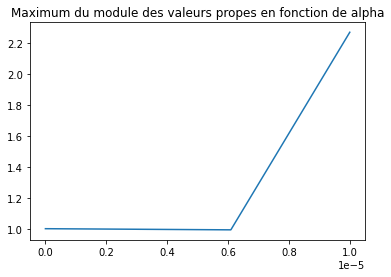

In [42]:
plot(alpha_list, max_mod)
title("Maximum du module des valeurs propes en fonction de alpha")
#ylim((0.90, 1.2))
#savefig("choix_alpha_1D_zoom.jpg")
show()